In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from dataprep.eda import create_report

import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_excel('Data_Train.xlsx')


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# check shaoe()
df.shape

(10683, 11)

In [5]:
## check all missing values

df.isna().sum()

#  just 2 mssing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.info()

# this also explain which data is null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# remove missing data
df.dropna(inplace = True)

In [8]:
df.isna().sum()
# now our data is clean

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
# check datatype of function
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
def change_format(i):
    df[i]= pd.to_datetime(df[i])
    return df
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_format(i)
    


In [11]:
#again check dtypes
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
# extract day & month from date
def extract_day_month():
    df['Journey_Day']= pd.DatetimeIndex(df['Date_of_Journey']).day
    df['Journey_Month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
    #     df['month'] = dt.datetime.month
    return df
extract_day_month()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-09-02 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-02 05:50:00,2021-09-02 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-02 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-09-02 18:05:00,2021-09-02 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-09-02 16:50:00,2021-09-02 21:35:00,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-09-02 19:55:00,2021-09-02 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-09-02 20:45:00,2021-09-02 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-09-02 08:20:00,2021-09-02 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-09-02 11:30:00,2021-09-02 14:10:00,2h 40m,non-stop,No info,12648,3,1


In [13]:
# extract hour min from time
def extract_hour(df,col):
    df[col + "_hour"]=df[col].dt.hour
    df[col + "_minutes"]=df[col].dt.minute
#     df[col + "_sec"]=df[col].dt.second
    return df
extract_hour(df , 'Dep_Time')
extract_hour(df , 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-09-02 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-02 05:50:00,2021-09-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-02 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-09-02 18:05:00,2021-09-02 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-09-02 16:50:00,2021-09-02 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-09-02 19:55:00,2021-09-02 22:25:00,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-09-02 20:45:00,2021-09-02 23:20:00,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-09-02 08:20:00,2021-09-02 11:20:00,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-09-02 11:30:00,2021-09-02 14:10:00,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


In [14]:
# # Now seprate min & hour from duration
# s = df['Duration']
# duration = s.str.split(expand=True)
# # duration = s.str.split(' ')[0][0:-1]
# # # final_df = pd.concat([df, duration], axis =1 )
# # # final_df
# # duration.rename(columns = {0 :'Duration Hours', 1 : 'Duration minutes'}, inplace = True)
# duration

duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
df['Duration']=duration            

def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(min)

In [15]:
# # rename columns
# final_df.rename(columns = {0 :'Duration Hours', 1 : 'Duration minutes'})

# # drop Date_of_Journey, Dep_Time Arrival_Time Duration as we dont need it anymore
# final_df.drop(columns = ['Date_of_Journey', 'Dep_Time' , 'Arrival_Time' , 'Duration'])

In [16]:
df.dtypes

Airline                         object
Date_of_Journey         datetime64[ns]
Source                          object
Destination                     object
Route                           object
Dep_Time                datetime64[ns]
Arrival_Time            datetime64[ns]
Duration                        object
Total_Stops                     object
Additional_Info                 object
Price                            int64
Journey_Day                      int64
Journey_Month                    int64
Dep_Time_hour                    int64
Dep_Time_minutes                 int64
Arrival_Time_hour                int64
Arrival_Time_minutes             int64
Duration_hours                  object
Duration_mins                   object
dtype: object

In [17]:
df.dtypes

Airline                         object
Date_of_Journey         datetime64[ns]
Source                          object
Destination                     object
Route                           object
Dep_Time                datetime64[ns]
Arrival_Time            datetime64[ns]
Duration                        object
Total_Stops                     object
Additional_Info                 object
Price                            int64
Journey_Day                      int64
Journey_Month                    int64
Dep_Time_hour                    int64
Dep_Time_minutes                 int64
Arrival_Time_hour                int64
Arrival_Time_minutes             int64
Duration_hours                  object
Duration_mins                   object
dtype: object

In [18]:
df.Duration_hours = df.Duration_hours.astype('int64')
df.Duration_mins = df.Duration_mins.astype('int64')

In [19]:
df.dtypes

Airline                         object
Date_of_Journey         datetime64[ns]
Source                          object
Destination                     object
Route                           object
Dep_Time                datetime64[ns]
Arrival_Time            datetime64[ns]
Duration                        object
Total_Stops                     object
Additional_Info                 object
Price                            int64
Journey_Day                      int64
Journey_Month                    int64
Dep_Time_hour                    int64
Dep_Time_minutes                 int64
Arrival_Time_hour                int64
Arrival_Time_minutes             int64
Duration_hours                   int64
Duration_mins                    int64
dtype: object

<AxesSubplot:title={'center':'Airline Name'}>

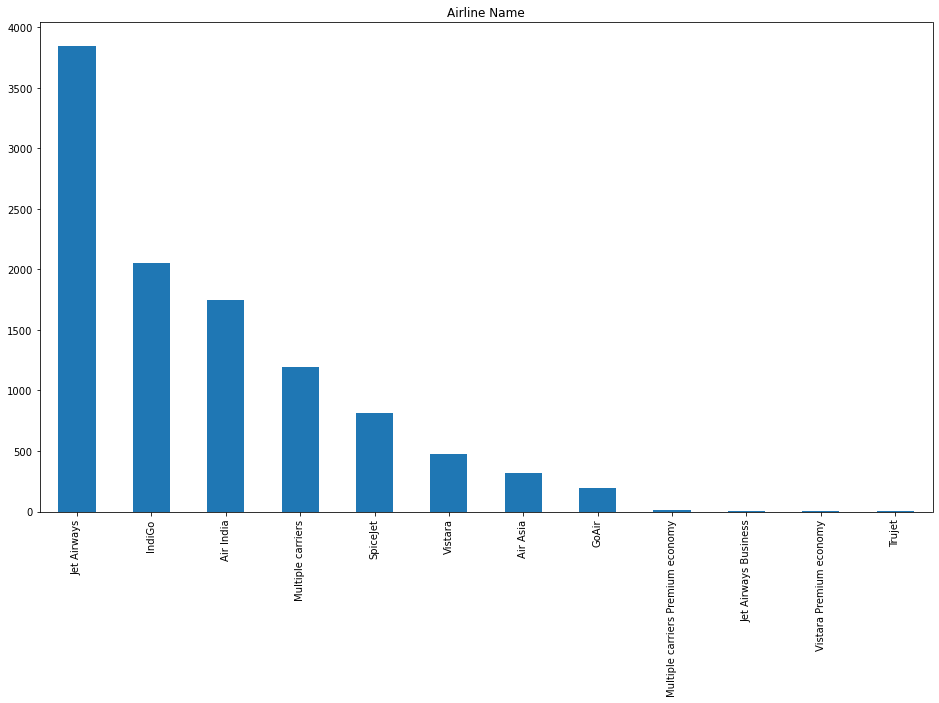

In [20]:
# graph to show which airline has maximum flight 
df['Airline'].value_counts().plot(kind='bar',title='Airline Name', figsize=(16,9))


<AxesSubplot:xlabel='Airline', ylabel='Price'>

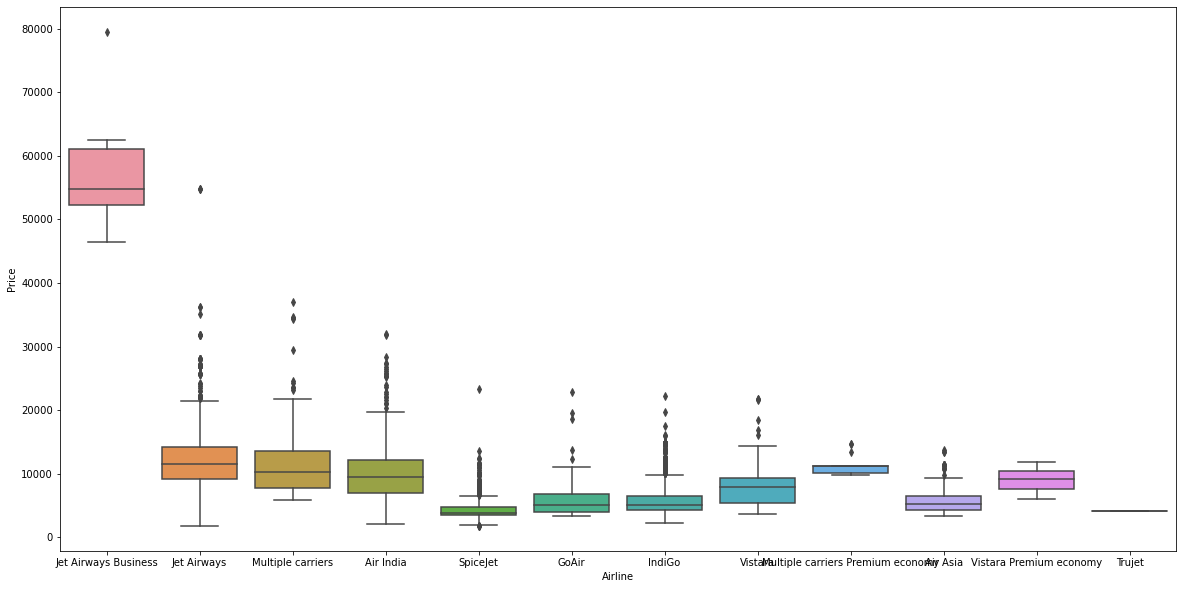

In [21]:
# graph btw price & airline
# it shows jet airline has high price
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

In [22]:
df.describe()


,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [23]:
df.describe(include='all')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
unique,12,40,5,6,128,222,1343,368,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jet Airways,2019-05-18 00:00:00,Delhi,Cochin,DEL → BOM → COK,2021-09-02 18:55:00,2021-09-02 19:00:00,2h 50m,1 stop,No info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-01-03 00:00:00,NaN,NaN,NaN,2021-09-02 00:20:00,2021-03-02 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-06 00:00:00,NaN,NaN,NaN,2021-09-02 23:55:00,2021-09-02 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000


In [24]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis= 1, inplace = True)

## Categorical Data

ML just Understand integer or numbers so convert categorical data into numbers 
so in this function catagorical data is obtained from the dataset

In [25]:
cat_data = []
for i in df.columns:
    if df[i].dtype=='O':
        cat_data.append(i)

In [26]:
# def cat_data():
#     cat_data = []
#     for i in df.columns:
#         if df[i].dtype=='O':
#             cat_data.append(i)
#     return cat_data
# cat_data()

In [27]:
cont_col = []
for i in df.columns:
    if df[i].dtype!='O':
        cont_col.append(i)

In [28]:
cont_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minutes',
 'Arrival_Time_hour',
 'Arrival_Time_minutes',
 'Duration_hours',
 'Duration_mins']

In [29]:
categorical=df[cat_data]
categorical.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info


In [30]:
from sklearn.preprocessing import OneHotEncoder


In [31]:
len(categorical['Airline'].unique())

12

In [32]:
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [35]:
categorical.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [36]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [37]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Duration has total 368 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



### as we will see we have lots of features in Route , one hot encoding will not be a better option so appply Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [39]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [40]:

categorical.drop('Additional_Info', axis =1)
categorical.drop('Route', axis = 1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,3h 0m,non-stop,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,0,13,29,13,5


In [41]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [42]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [43]:
df[cont_col]

,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [44]:
df[cont_col]

,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [45]:
 ## Concatenate dataframe --> categorical + Airline + Source + Destination

df=pd.concat([categorical,Airline,Source,Destination,df[cont_col]],axis=1)
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minutes',
       'Arrival_Time_hour', 'Arrival_Time_minutes', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [46]:
## final dataset
df.drop(['Airline', 'Source','Destination','Route','Duration','Additional_Info'], axis = 1, inplace =True)

In [47]:
df

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,...,0,4107,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,...,0,4145,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,...,0,7229,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,...,1,12648,3,1,11,30,14,10,2,40


In [48]:
### separate independent & dependent data

x=df.drop('Price',axis=1)
x.head()
y=df['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [49]:
## split dataset into train & test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
X_train.dtypes

Total_Stops                          int64
Route_1                              int32
Route_2                              int32
Route_3                              int32
Route_4                              int32
Route_5                              int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin                               uint8
Delhi                                uint8
Hyderabad  

In [51]:
# from xgboost import XGBRegressor
# model =  XGBRegressor()
# model.fit(x_train,y_train)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor()

In [54]:
y_pred =  model.predict(X_test)
print('Training Score :',model.score(X_train, y_train))
print('Test Score     :',model.score(X_test, y_test))

Training Score : 0.9544321717983248
Test Score     : 0.8186711497048316


# Label Encoder to handle airline

In [52]:

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
categorical['Airlines_Cat'] = labelencoder.fit_transform(df['Airline'])
df

KeyError: 'Airline'

# Label encoder for source

In [ ]:
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
categorical['categorical'] = labelencoder.fit_transform(df['Source'])
df

### label encoder for Destination

In [ ]:
df['Destination_cat'] = labelencoder.fit_transform(df['Destination'])
df

## Label encoder for route

In [ ]:
df['Route_cat'] = labelencoder.fit_transform(df['Route'])

df